Through linear interpolation we estimate that our point at x = -1.5 is (-1.5, -0.7999999999999998)
Through polynomial interpolation we estimate that our point at x = -1.5 is (-1.5, 10.628199999999907)


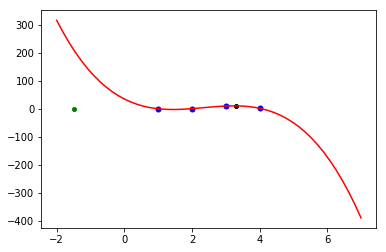

In [6]:
import math as math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def poly_func(f, x):
    """f is a list of the polynomial coefficients where the index
    matches the variable exponent. x is the point to evaluate f at"""
    y = 0
    for i in range(len(f)):
        y +=  f[i]*(x)**i
    return y

def bounds(x, y, z):
    """Finds the two numbers in a linear list x that z is between and
    returns them and their y values. If z is not in the list returns 
    either first two points or last two points. Mainly for use by lin_inter function"""
    xstep = x[1] - x[0]
    divider = math.floor((z-x[0])/xstep)
    xbound = x[0] + divider*xstep
    if xbound < z:
        lowerindex = divider
        upperindex = divider + 1
    else:
        lowerindex = divider + 1
        upperindex = divider

    if lowerindex >= 0 and upperindex <= len(x)-1:
        return x[lowerindex], x[upperindex], y[lowerindex], y[upperindex]

    elif lowerindex < 0:
        return x[0], x[1], y[0], y[1]

    else:
        return x[-2], x[-1], y[-2], y[-1]

        
def lin_inter(x, y, z):
    """Finds the y value of z interperolated or extrapolated using data in x."""
    x1, x2, y1, y2 = bounds(x, y, z)
    return (z-x1)*(y2-y1)/(x2-x1) + y1

def lagrange_poly(x, y):
    """Finds the unique polynomial of order n-1 that passes through all 
    points in x (x having n points). Output is a list of polynomial
    coefficients whose index matches the variables' exponent."""
    final = []
    final_dict = {}
    for i in range(len(x)):
        final_dict['x' + str(i)] = 0
        
    for i in range(len(x)):
        xj = np.delete(x, i)
        li = [-xj[0], 1]
        
        # Calculating the numerator by matching list indexes to variable exponent
        for j in range(1, len(xj)):
            variables = {}
            product = [-xj[j], 1]
            for var in range(len(li)):
                for n in range(2):
                    value = li[var]*product[n]
                    key = 'x' + str(var + n)
                    if key in variables:
                        variables[key] += value
                    else:
                        variables[key] = value
            li = []
            for order in range(len(variables)):
                li += [variables['x' + str(order)]]
        
        # Calculating the denominator and y(i)
        product = x[i] - xj[0]
        for j in range(1, len(xj)):
            product *= (x[i] - xj[j])
        scalar = y[i]/product
        
        # Saving values before going to the next term in the sum
        for dump in variables:
            final_dict[dump] += scalar*variables[dump]   
            
    for i in range(len(final_dict)):
        final += [final_dict['x' + str(i)]]
    return final
            
            
        
# Modify according to your data
x = np.array([1, 2, 3, 4])
y = np.array([0.2, 0.6, 10, 2])
xp1 = -1.5 # Point you want to interpolate


yp1 = lin_inter(x, y, xp1)
print("Through linear interpolation we estimate that our point at x = -1.5 is (" + str(xp1) + ",", str(yp1) + ")")

plt.plot(x, y, 'bo', markersize=5, color ='blue')
plt.plot(xp1, yp1, 'bo', markersize=4, color='green')

lagrange = lagrange_poly(x, y)
    
xpoly = np.linspace(2*x[0] - x[-1], 2*x[-1] - x[0], 50) # Computing the range over which to draw the polynomial
ypoly = []
for i in xpoly:
    ypoly += [poly_func(lagrange, i)]
xp3 = 3.3
yp3 = poly_func(lagrange, xp3)
print("Through polynomial interpolation we estimate that our point at x = -1.5 is (" + str(xp1) + ",", str(yp3) + ")")
    
plt.plot(xp3, yp3, 'bo', color='black', markersize=4)
plt.plot(xpoly, ypoly, color='red')
